<a href="https://colab.research.google.com/github/tvisha03/ISS-lab-work/blob/main/01_chosen_plaintext_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPA for Pattern Analysis / ECB Weakness


In [ ]:
def xor_encrypt_block(block, key):
    # XOR each byte of the block with the key
    return ''.join(chr(ord(block[i]) ^ ord(key[i])) for i in range(len(block)))

def mock_ecb_encrypt(plaintext, key):
    block_size = len(key)
    ciphertext = []

    for i in range(0, len(plaintext), block_size):
        block = plaintext[i:i + block_size]

        # Padding if block is shorter than key
        if len(block) < block_size:
            block += ' ' * (block_size - len(block))

        encrypted_block = xor_encrypt_block(block, key)
        ciphertext.append(encrypted_block)

    return ''.join(ciphertext)


In [ ]:
# Define key (8-character key = 64-bit)
key = "ABC123!!"

# Test Case 1: Repeating blocks (clear CPA pattern leak)
plaintext1 = "AAAAAAAAAAAAAAAA"  # Two identical blocks of 'A'

# Test Case 2: Slight variation in second block
plaintext2 = "AAAAAAAAAAAAAAAB"  # First block = 'A'*8, second block is slightly different

# Test Case 3: No repetition
plaintext3 = "ABCDEFGH12345678"

# Run ECB encryption for all
cipher1 = mock_ecb_encrypt(plaintext1, key)
cipher2 = mock_ecb_encrypt(plaintext2, key)
cipher3 = mock_ecb_encrypt(plaintext3, key)


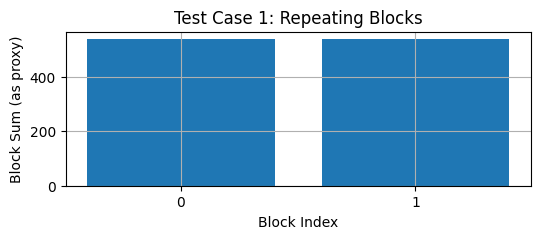

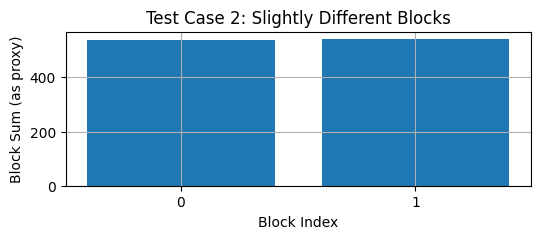

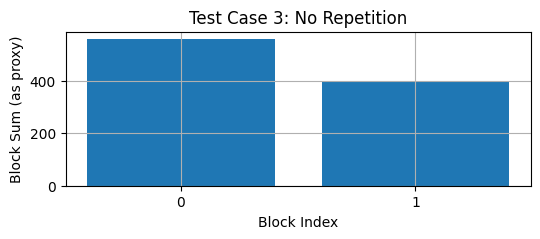

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_blocks(ciphertext, block_size, title=""):
    blocks = [ciphertext[i:i + block_size] for i in range(0, len(ciphertext), block_size)]
    block_values = [sum(ord(c) for c in block) for block in blocks]

    plt.figure(figsize=(6, 2))
    plt.title(title)
    plt.bar(range(len(block_values)), block_values)
    plt.xlabel("Block Index")
    plt.ylabel("Block Sum (as proxy)")
    plt.xticks(range(len(block_values)))
    plt.grid(True)
    plt.show()

# Visualize each test case
visualize_blocks(cipher1, len(key), "Test Case 1: Repeating Blocks")
visualize_blocks(cipher2, len(key), "Test Case 2: Slightly Different Blocks")
visualize_blocks(cipher3, len(key), "Test Case 3: No Repetition")


In [ ]:
def print_blocks(label, plaintext, ciphertext, block_size):
    pt_blocks = [plaintext[i:i+block_size] for i in range(0, len(plaintext), block_size)]
    ct_blocks = [ciphertext[i:i+block_size] for i in range(0, len(ciphertext), block_size)]
    hex_blocks = [block.encode().hex() for block in ct_blocks]

    print(f"\n{label}")
    print("Plaintext blocks:", pt_blocks)
    print("Ciphertext blocks (hex):", hex_blocks)

# Print details for each
print_blocks("Test Case 1", plaintext1, cipher1, len(key))
print_blocks("Test Case 2", plaintext2, cipher2, len(key))
print_blocks("Test Case 3", plaintext3, cipher3, len(key))



Test Case 1
Plaintext blocks: ['AAAAAAAA', 'AAAAAAAA']
Ciphertext blocks (hex): ['0003027073726060', '0003027073726060']

Test Case 2
Plaintext blocks: ['AAAAAAAA', 'AAAAAAAB']
Ciphertext blocks (hex): ['0003027073726060', '0003027073726063']

Test Case 3
Plaintext blocks: ['ABCDEFGH', '12345678']
Ciphertext blocks (hex): ['0000007577756669', '7070700507051619']


# Key Recovery using Chosen Plaintext Attack

In [ ]:
# Reuse the XOR encryption function from earlier

def recover_xor_key(plaintext_block, ciphertext_block):
    # XOR ciphertext with known plaintext to recover key
    return ''.join(chr(ord(ciphertext_block[i]) ^ ord(plaintext_block[i])) for i in range(len(plaintext_block)))

# Step 1: Use a known plaintext (chosen by attacker)
known_plaintext = "A" * len(key)  # 'A'*8 = 0x41
# Step 2: Encrypt using unknown key (simulated)
ciphertext = mock_ecb_encrypt(known_plaintext, key)
# Step 3: Get the first block of ciphertext
first_cipher_block = ciphertext[:len(key)]

# Step 4: Recover the key
recovered_key = recover_xor_key(known_plaintext, first_cipher_block)

# Step 5: Show the result
print(f"Known Plaintext Block: {known_plaintext}")
print(f"Observed Ciphertext Block (hex): {first_cipher_block.encode().hex()}")
print(f"Recovered Key: {recovered_key}")


Known Plaintext Block: AAAAAAAA
Observed Ciphertext Block (hex): 0003027073726060
Recovered Key: ABC123!!


#

# AES in ECB Mode (Real AES Encryption)


In [ ]:
!pip install pycryptodome


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.3 MB/s eta 0:00:00


In [ ]:
from Crypto.Cipher import AES
import binascii

# AES key must be exactly 16 bytes (128-bit)
aes_key = b"ThisIsA16ByteKey"

# 16-byte block repeated twice = 32 bytes total
block = b"REPEATBLOCK1234!"  # 16 bytes
plaintext = block + block    # 32 bytes

# Now encrypt without padding (already aligned)
cipher = AES.new(aes_key, AES.MODE_ECB)
aes_ciphertext = cipher.encrypt(plaintext)

# Display both blocks
print("Ciphertext (hex):", binascii.hexlify(aes_ciphertext))
print("Block 1:", binascii.hexlify(aes_ciphertext[:16]))
print("Block 2:", binascii.hexlify(aes_ciphertext[16:32]))



Ciphertext (hex): b'd26c1fd01a97b3e0279dade5d437b8b0d26c1fd01a97b3e0279dade5d437b8b0'
Block 1: b'd26c1fd01a97b3e0279dade5d437b8b0'
Block 2: b'd26c1fd01a97b3e0279dade5d437b8b0'
